Here we will analyze the Nifty50 stock data for last 10 years.

1. First we will perform descriptive analysis of the stocks based on various metrics and find the top stocks
2. Next we will perform predictive analysis by creating a portfolio of stocks using Modern Portfolio Theory


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Basic analysis of top stocks

In [ ]:
nifty50 = pd.read_csv('/content/NIFTY50_all.csv')
nifty50.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [ ]:
nifty50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

In [ ]:
nifty50['Date'] = pd.to_datetime(nifty50['Date'])


Lets pick those stocks which are available for at least 4000 days

In [ ]:
df_4000 = nifty50.groupby('Symbol').filter(lambda x: len(x) >= 4000)

In [ ]:
df_4000.shape

(150831, 15)

In [ ]:
df_group_volume = df_4000.groupby('Symbol')['Volume'].mean()

Finding Top 5 Stocks based on average Volume traded

In [ ]:
top5_by_vol = df_group_volume.sort_values(ascending=False).head(5)
top5_by_vol

,Volume
Symbol,
TATAMOTORS,1.247240e+07
SBIN,1.003930e+07
ICICIBANK,8.224631e+06
NTPC,7.226587e+06
ITC,7.173165e+06


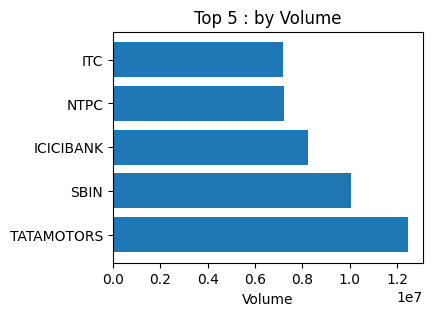

In [ ]:
# visualize the top 5 vol
plt.figure(figsize=(4,3))
plt.barh(top5_by_vol.index,top5_by_vol.values)
plt.xlabel('Volume')
plt.title('Top 5 Stocks : by Volume')
plt.show()


In [ ]:
df_group_vwap = df_4000.groupby('Symbol')['VWAP'].mean()

Finding Top 5 Stocks based on average VWAP

In [ ]:
top5_by_vwap = df_group_vwap.sort_values(ascending=False).head(5)
top5_by_vwap

,VWAP
Symbol,
EICHERMOT,6754.185869
SHREECEM,6565.083878
MARUTI,2926.480642
ULTRACEMCO,2151.959976
DRREDDY,1829.621266


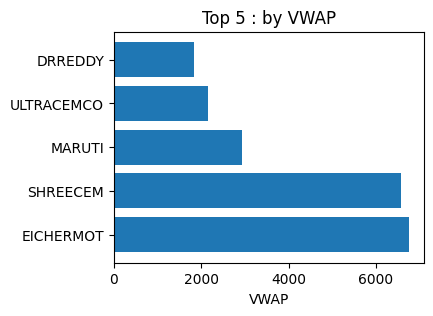

In [ ]:
# visualize the top 5 vwap
plt.figure(figsize=(4,3))
plt.barh(top5_by_vwap.index,top5_by_vwap.values)
plt.xlabel('VWAP')
plt.title('Top 5 : by VWAP')
plt.show()

In [ ]:
df_group_turnover = df_4000.groupby('Symbol')['Turnover'].mean()

Finding Top 5 Stocks based on average Turnover

In [ ]:
top5_by_turnover = df_group_turnover.sort_values(ascending=False).head(5)
top5_by_turnover

,Turnover
Symbol,
RELIANCE,6.076715e+14
SBIN,4.136854e+14
ICICIBANK,3.759336e+14
TATAMOTORS,3.352950e+14
TCS,2.952102e+14


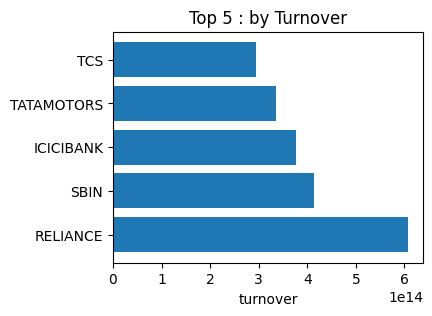

In [ ]:
# visualize the top 5 turnover
plt.figure(figsize=(4,3))
plt.barh(top5_by_turnover.index,top5_by_turnover.values)
plt.xlabel('turnover')
plt.title('Top 5 : by Turnover')
plt.show()

In [ ]:
df_group_delivery = df_4000.groupby('Symbol')['Deliverable Volume'].mean()

Finding Top 5 Stocks based on average Delivery

In [ ]:
top5_by_delivery = df_group_delivery.sort_values(ascending=False).head(5)
top5_by_delivery

,Deliverable Volume
Symbol,
ITC,4.571758e+06
ICICIBANK,4.183406e+06
NTPC,3.865508e+06
TATAMOTORS,3.056415e+06
SBIN,3.012573e+06


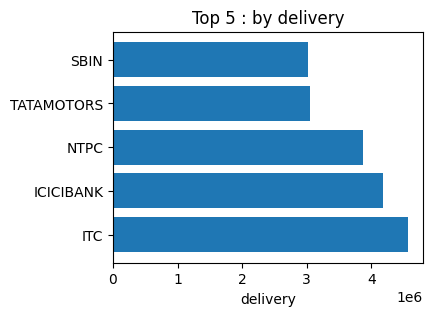

In [ ]:
# visualize the top 5 delivery
plt.figure(figsize=(4,3))
plt.barh(top5_by_delivery.index,top5_by_delivery.values)
plt.xlabel('delivery')
plt.title('Top 5 : by delivery')
plt.show()

In [ ]:
close4000 = df_4000.pivot(index='Date',columns='Symbol',values='Close')

In [ ]:
close4000

Symbol,ASIANPAINT,BPCL,BRITANNIA,CIPLA,DRREDDY,EICHERMOT,GAIL,GRASIM,HCLTECH,HDFC,...,ONGC,RELIANCE,SBIN,SHREECEM,SUNPHARMA,TATAMOTORS,TCS,TITAN,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,381.65,399.25,756.90,1457.35,1508.25,48.85,68.70,438.30,NaN,293.50,...,213.45,251.70,243.65,64.75,1835.05,NaN,NaN,155.70,NaN,2724.20
2000-01-04,385.55,370.50,754.55,1465.25,1628.95,51.40,66.35,437.15,NaN,304.05,...,206.55,271.85,259.10,59.85,1810.45,NaN,NaN,147.40,NaN,2942.15
2000-01-05,383.00,359.95,735.30,1435.05,1568.05,55.55,63.20,439.60,NaN,292.80,...,223.10,282.50,248.45,60.00,1746.90,NaN,NaN,138.40,NaN,2990.10
2000-01-06,377.50,380.30,785.65,1355.85,1661.55,60.00,64.95,474.80,NaN,296.45,...,219.30,294.35,261.00,60.60,1745.20,NaN,NaN,149.50,NaN,2932.25
2000-01-07,385.70,379.85,848.50,1247.55,1529.10,64.65,62.65,512.80,NaN,286.55,...,215.75,314.55,273.30,60.45,1605.60,NaN,NaN,146.35,NaN,2697.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2557.90,418.90,3539.20,905.40,5066.70,2369.85,130.00,1312.35,928.80,2509.80,...,102.80,1937.85,344.30,28062.60,634.70,295.40,3100.80,1479.85,6275.90,480.30
2021-04-27,2574.35,420.35,3541.20,912.40,5057.25,2400.10,131.55,1331.20,928.85,2518.40,...,103.20,1988.65,353.05,28098.55,639.25,301.50,3132.00,1495.10,6326.80,485.05
2021-04-28,2614.55,417.50,3478.75,910.20,5044.45,2521.20,133.35,1341.15,923.80,2577.00,...,103.90,1997.30,363.40,28687.55,643.40,305.90,3124.10,1508.85,6360.80,489.30


We will analyze the stocks based on the Returns generated

Finding the individual stock return : Resampling the data by Year and then finding the average annual return

In [ ]:
asset_return = close4000.resample('Y').last().pct_change().dropna().mean()

<ipython-input-55-5f4e547f1799>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  asset_return = close4000.resample('Y').last().pct_change().dropna().mean()


Getting Top 10 Stocks based on average Annual Return

In [ ]:
top10return = asset_return.sort_values(ascending=False).head(10)*100
top10return

,0
Symbol,
SHREECEM,52.862834
TITAN,48.253876
INDUSINDBK,37.848604
EICHERMOT,37.528024
KOTAKBANK,28.474207
ULTRACEMCO,28.473541
TATAMOTORS,27.624874
ASIANPAINT,27.579246
MARUTI,27.565096


The analysis show top 10 stocks with highest return over the years

From the analyis >> SHREECEM and TITAN gives the best annual return respectively at 53% and 48%

Now analyzing the stocks based on Volatility

We will find daily level volatility first and then multiply by 252(number of working days in a year when stock are traded) to calculate annual volatility

In [ ]:

asset_volatility = close4000.pct_change().dropna().std()
annual_volatility = asset_volatility*np.sqrt(252)*100

<ipython-input-65-32af78230070>:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  asset_volatility = close4000.pct_change().dropna().std()


Finding the stocks with least Volatility

In [ ]:
bottom10vol =  annual_volatility.sort_values().head(10)
bottom10vol

,0
Symbol,
NTPC,30.192440
DRREDDY,32.321354
ULTRACEMCO,33.149342
CIPLA,33.153924
MARUTI,33.179561
SHREECEM,34.725669
BRITANNIA,35.448388
ASIANPAINT,35.471583
TCS,37.869679


The analysis show top 10 stocks with lowest risk(volatility)

From the analysis : NTPC and DRREDDY are the stocks with lowest volatility with annual volatility of 30% and 32% respectively

Strategy to pick stocks for Portfolio

A person or entity might have different risk apetite and one might choose stocks/trades based on this requirement

We will follow a numerical approach to find the Return to Risk ratio for the investment and try to maximize the ratio

Here we pick all the Stcoks which are common to both the lists obtained from Top 10 stocks by Return and Top 10 stocks by Volatility >>

SHREECEM, ULTRACEMCO, MARUTI, ASIANPAINT


**We will create a portfolio consisting of 6 stocks**

We pick one stock from Top 10 stocks by Return : TITAN (48%)

We pick one stock from Top 10 stocks by Volatility > DRREDDY (32%)



The portfolio now contains 6 Stcoks :

SHREECEM

ULTRACEMCO

MARUTI

ASIANPAINT

TITAN

DRREDDY

In [ ]:
nifty6 = close4000[['SHREECEM','ULTRACEMCO','MARUTI','ASIANPAINT','TITAN','DRREDDY']]

Now that we have figured out the stocks to invest, we need to find out how much amount to invest in which stocks. Here we will use MPT or Modern Portfolio Theory to find the optimal Return to Risk ratio

Creating some lists to store the Weights(% of investment), Return and Volatility that will be generated while running the MPT

Number of Asset = Number of stocks

Number of Loop = Number of times we want to randomly assign weights and calculate the return and risk of the portfolio

In [ ]:
pf_ret = []
pf_vol = []
pf_weight = []
num_asset = len(nifty6.columns)
num_loop = 5000

Computing individual return for the selected stocks

In [ ]:
ind_ret = nifty6.resample('Y').last().pct_change().mean()*100

<ipython-input-92-0a4754ae56cf>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_ret = nifty6.resample('Y').last().pct_change().mean()*100


In [ ]:
ind_ret

,0
Symbol,
SHREECEM,57.363279
ULTRACEMCO,28.473541
MARUTI,27.317462
ASIANPAINT,23.101327
TITAN,47.726268
DRREDDY,13.253383


Computing covariance of the Portfolio

In [ ]:
d_return = nifty6.pct_change().dropna()
cov1 = d_return.cov()*252

<ipython-input-94-b337692daaca>:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  d_return = nifty6.pct_change().dropna()


In [ ]:
#  lets loop through random combinations of weights and find the respective returns and risks

for i in range(num_loop):

# normalizing the weights
  wgt1 = np.random.random(num_asset)
  wgt1 =  wgt1/np.sum(wgt1)
  pf_weight.append(wgt1)

# Return is dot product of (individual ret, weights )
  ret1 = np.dot(wgt1,ind_ret)
  pf_ret.append(ret1)

#  computing the variance

  var1 = cov1.mul(wgt1,axis=0).mul(wgt1,axis=1).sum().sum()
  sd1 = np.sqrt(var1)
  annual_sd1 = sd1*np.sqrt(252)
  pf_vol.append(annual_sd1)

In [ ]:
#  now creating dict of return, vloatility
wgt_compare_data1 = {'Returns':pf_ret,'Volatility':pf_vol}

for counter, symbol in enumerate(nifty6.columns.tolist()):
  wgt_compare_data1[symbol+' weight'] = [w[counter] for w in pf_weight]


In [ ]:
wgt_compare_data1 = pd.DataFrame(wgt_compare_data1)
wgt_compare_data1

,Returns,Volatility,SHREECEM weight,ULTRACEMCO weight,MARUTI weight,ASIANPAINT weight,TITAN weight,DRREDDY weight
0,35.896611,3.798158,0.167551,0.218160,0.220376,0.027543,0.248355,0.118015
1,30.088811,3.668372,0.016096,0.225050,0.185617,0.239355,0.224305,0.109576
2,34.523871,3.657756,0.164514,0.037984,0.190908,0.262388,0.236903,0.107303
3,28.512154,3.376313,0.170074,0.001853,0.118247,0.244351,0.106148,0.359326
4,31.147469,3.528210,0.165742,0.267303,0.302008,0.082816,0.042115,0.140017
...,...,...,...,...,...,...,...,...
4995,32.368195,3.965723,0.025414,0.286332,0.013110,0.211724,0.329718,0.133701
4996,35.161855,3.514138,0.226144,0.222179,0.163031,0.111926,0.149583,0.127137
4997,34.718457,3.541707,0.233331,0.304897,0.032285,0.138692,0.136699,0.154097
4998,33.001468,3.387104,0.196089,0.156519,0.148278,0.152465,0.148798,0.197851


Plotting efficient frontier : Graphical visualization of the risk and return values obtained over the iteration

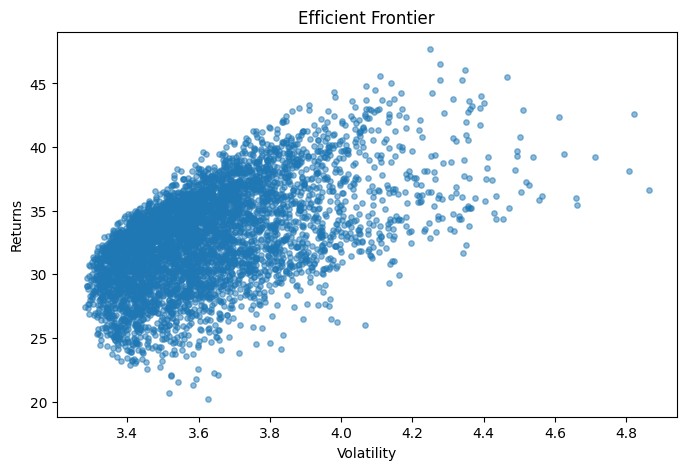

In [ ]:

wgt_compare_data1.plot.scatter(x='Volatility',y='Returns',marker='o',s=15,alpha=0.5, figsize=(8,5))
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Efficient Frontier')
plt.show()

Minimum Volatility Portfolio >

Selecting optimal combination based on Minimum Volatility of the Portfolio

In [ ]:
min_vol_port1 = wgt_compare_data1.iloc[wgt_compare_data1['Volatility'].idxmin()]
min_vol_port1

,1622
Returns,27.416797
Volatility,3.281134
SHREECEM weight,0.138908
ULTRACEMCO weight,0.109141
MARUTI weight,0.170773
ASIANPAINT weight,0.227184
TITAN weight,0.050358
DRREDDY weight,0.303635


Minimum Volatility Portfolio :

ASIANPAINT -	22.7%

DRREDDY - 30.3%

MARUTI - 17%

TITAN - 5%

SHREECEM - 14%

ULTRACEMCO - 11%

Highest Sharpe Ratio Portfolio >

Selecting optimal combination based on Maximum Return to Risk ratio ( Taking into account a risk factor)

In [ ]:
# risk factor = rf
rf =0.01
optimal_sharpe1 = wgt_compare_data1.iloc[((wgt_compare_data1['Returns']-rf)/wgt_compare_data1['Volatility']).idxmax()]
optimal_sharpe1

,2985
Returns,47.685281
Volatility,4.249361
SHREECEM weight,0.645690
ULTRACEMCO weight,0.070428
MARUTI weight,0.042563
ASIANPAINT weight,0.095250
TITAN weight,0.096946
DRREDDY weight,0.049123


Highest Sharpe Ratio Portfolio :

SHREECEM - 64.6%

ASIANPAINT - 9.5%

TITAN - 9.5%

ULTRACEMCO - 7%

DRREDDY - 5%

MARUTI - 4.2%

Finally visualize these optimal points on the Efficient Frontier plot

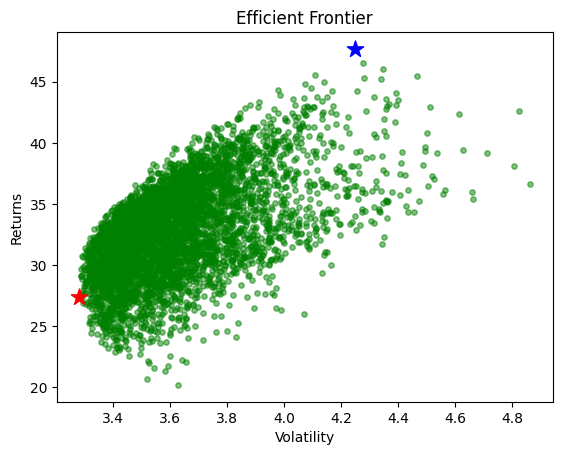

In [ ]:
plt.scatter(wgt_compare_data1.Volatility,wgt_compare_data1.Returns,marker='o',s=15,alpha=0.5, color= 'green')
plt.scatter(min_vol_port1.iloc[1],min_vol_port1.iloc[0],marker='*',color='red',s=150)
plt.scatter(optimal_sharpe1.iloc[1],optimal_sharpe1.iloc[0],marker='*',color='blue',s=150)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Efficient Frontier')
plt.show()